## MNIST Data Set

The purpose of this Jupyter Notebook is to create a classifier that is able to look at the MNIST data set and determine with a good deal of accuracy whether or not a number in the data set is a 5 or is another number. This will then be followed by the creation of a model that is able to classify with a good deal of accuracy what any given number is within the data set. 

In [1]:
#Get the MNIST data set and label it accoringly
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X,y = mnist["data"],mnist['target']

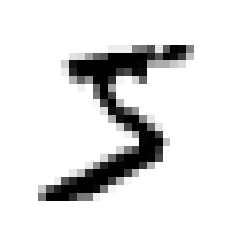

In [4]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

In [5]:
some_digit_target = y[0]
some_digit_target

'5'

In [6]:
y = y.astype(np.uint8)

In [7]:
#Split the data set into a test and train set for this model.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
#Create a binary prediction model that can tell you if the MNIST number is a 5.
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
#Predict whether or not some_digit is a 5 - spoiler alert some_digit is a 0.
sgd_clf.predict([some_digit])

array([ True])

In [10]:
#Utilise Cross-Validation to determine how good this model really is
skfolds = StratifiedKFold(n_splits=3, random_state=42,shuffle=True)

for train_index, test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred)) 

0.9669
0.91625
0.96785


In [11]:
# Let's test how accurately this model is running by getting the CV score
cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring='accuracy')

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

In [12]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5)

In [13]:
cf_matrix = confusion_matrix(y_train_5, y_train_pred)
cf_matrix

array([[53115,  1464],
       [  916,  4505]])

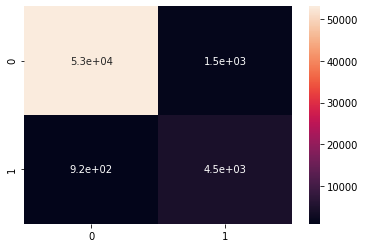

In [14]:
sns.heatmap(cf_matrix, annot=True)

## Multiclass Classification - Get ALL the numbers
As promised above, here is the code for a multiple classification machine. 

In [15]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [16]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [17]:
# Try to use the OvR strategy rather than OvO
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [25]:
ovr_clf.predict([some_digit])
#len(ovr_clf.estimators_)

array([0], dtype=uint8)

0